In [1]:
# -*- coding: utf-8 -*-
# https://www.youtube.com/watch?v=OuYtk9Ymut4&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=5&t=0s
# https://www.youtube.com/watch?v=A9QVYOBjZdY&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=5
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt',encoding="utf8").read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


448, 'addle': 1449, 'brain': 1450, 'ringin': 1451, 'glamour': 1452, 'gas': 1453, 'guff': 1454, 'whisper': 1455, 'oil': 1456, 'remarkable': 1457, 'policeman': 1458, 'bluff': 1459, 'maintain': 1460, 'guril': 1461, 'sic': 1462, 'passage': 1463, 'rough': 1464, 'borne': 1465, 'breeze': 1466, 'boundless': 1467, 'stupendous': 1468, 'roll': 1469, 'thundering': 1470, 'motion': 1471, 'mermaids': 1472, 'fierce': 1473, 'tempest': 1474, 'gathers': 1475, 'oneill': 1476, 'odonnell': 1477, 'lucan': 1478, 'oconnell': 1479, 'brian': 1480, 'drove': 1481, 'danes': 1482, 'patrick': 1483, 'vermin': 1484, 'whose': 1485, 'benburb': 1486, 'blackwater': 1487, 'owen': 1488, 'roe': 1489, 'munroe': 1490, 'lambs': 1491, 'skip': 1492, 'views': 1493, 'enchanting': 1494, 'rostrevor': 1495, 'groves': 1496, 'lakes': 1497, 'ride': 1498, 'tide': 1499, 'majestic': 1500, 'shannon': 1501, 'sail': 1502, 'loch': 1503, 'neagh': 1504, 'ross': 1505, 'gorey': 1506, 'saxon': 1507, 'tory': 1508, 'soil': 1509, 'sanctified': 1510, 'en

In [3]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [4]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [5]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [6]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [7]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(tokenizer.word_index)

f': 1448, 'addle': 1449, 'brain': 1450, 'ringin': 1451, 'glamour': 1452, 'gas': 1453, 'guff': 1454, 'whisper': 1455, 'oil': 1456, 'remarkable': 1457, 'policeman': 1458, 'bluff': 1459, 'maintain': 1460, 'guril': 1461, 'sic': 1462, 'passage': 1463, 'rough': 1464, 'borne': 1465, 'breeze': 1466, 'boundless': 1467, 'stupendous': 1468, 'roll': 1469, 'thundering': 1470, 'motion': 1471, 'mermaids': 1472, 'fierce': 1473, 'tempest': 1474, 'gathers': 1475, 'oneill': 1476, 'odonnell': 1477, 'lucan': 1478, 'oconnell': 1479, 'brian': 1480, 'drove': 1481, 'danes': 1482, 'patrick': 1483, 'vermin': 1484, 'whose': 1485, 'benburb': 1486, 'blackwater': 1487, 'owen': 1488, 'roe': 1489, 'munroe': 1490, 'lambs': 1491, 'skip': 1492, 'views': 1493, 'enchanting': 1494, 'rostrevor': 1495, 'groves': 1496, 'lakes': 1497, 'ride': 1498, 'tide': 1499, 'majestic': 1500, 'shannon': 1501, 'sail': 1502, 'loch': 1503, 'neagh': 1504, 'ross': 1505, 'gorey': 1506, 'saxon': 1507, 'tory': 1508, 'soil': 1509, 'sanctified': 1510

In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=20, verbose=1)
#print model.summary()
print(model)

Train on 12038 samples
Epoch 1/20
12038/12038 [==============================] - 21s 2ms/sample - loss: 6.6297 - accuracy: 0.0743
Epoch 2/20
12038/12038 [==============================] - 15s 1ms/sample - loss: 5.7636 - accuracy: 0.1115
Epoch 3/20
12038/12038 [==============================] - 15s 1ms/sample - loss: 4.9677 - accuracy: 0.1572
Epoch 4/20
12038/12038 [==============================] - 16s 1ms/sample - loss: 4.1047 - accuracy: 0.2245
Epoch 5/20
12038/12038 [==============================] - 16s 1ms/sample - loss: 3.2511 - accuracy: 0.3222
Epoch 6/20
12038/12038 [==============================] - 16s 1ms/sample - loss: 2.5593 - accuracy: 0.4272
Epoch 7/20
12038/12038 [==============================] - 16s 1ms/sample - loss: 2.0636 - accuracy: 0.5236
Epoch 8/20
12038/12038 [==============================] - 16s 1ms/sample - loss: 1.7066 - accuracy: 0.6008
Epoch 9/20
12038/12038 [==============================] - 16s 1ms/sample - loss: 1.4198 - accuracy: 0.6557
Epoch 10/20
12

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

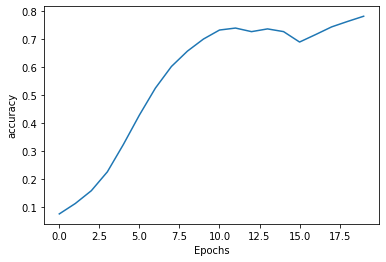

In [11]:
plot_graphs(history, 'accuracy')

In [12]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this hair of do see no more corn the broad daylight guns and row and by night gone by and your eyes eyes glisten and by the sea may be rough gone and the morning early before his wild water gone and the rat catchers daughter of their mantle were spreading love and gone by the sea may be rough gone and the morning sunbeam green and the sea we can gone and the covers buttoned down to the gone and the green love and love in your eyes glisten green tree to go courting and cried meelia murther and yet
